## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix




from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

In [2]:
train = np.loadtxt('./data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('./data/digit/test.csv', delimiter=',', skiprows=1)

In [3]:
test.shape

(28000, 784)

In [4]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [69]:

X_train, X_valid, y_train, y_valid = train_test_split(np.resize(train_img, (train.shape[0], 28*28)), train_label, test_size=0.30, random_state=42)

In [70]:
estimators = {
    
   
    'knn': KNeighborsClassifier(n_jobs=-1),
    'tree': DecisionTreeClassifier(),
    'forest': linear_model.SGDClassifier(n_jobs=-1),
    'SVC': LinearSVC(),
    'XGB': XGBClassifier(n_jobs=-1)
}

In [7]:
estimators = {
    
   
    'knn': KNeighborsClassifier(n_jobs=-1),}

In [71]:
results=pd.DataFrame(columns=['model','Mean_cross_val_Accuracy','Valid_Accuracy'])

In [ ]:
 results = results.append({'model' : 'cv_'+Xes , 'mean_cv_train_score' : scores.mean(),'test_score':test_score} , ignore_index=True)

In [72]:
results

,model,Mean_cross_val_Accuracy,Valid_Accuracy


In [73]:
%%time
for est in estimators: 
    globals()[est]=estimators[est]
    eval(est).fit(X_train,y_train)
    cross_val_scores = cross_val_score(eval(est), X_train,y_train, cv=5,n_jobs=-1)
    valid_score=accuracy_score(y_valid, eval(est).predict(X_valid))
    print(est+' Mean_cross_val_Accuracy ',cross_val_scores.mean(),' Valid_Accuracy: ' ,valid_score)
    results = results.append({'model' : est , 'Mean_cross_val_Accuracy' : cross_val_scores.mean(),'Valid_Accuracy':valid_score} , ignore_index=True)
    print('____________________________________________________________________')

knn Mean_cross_val_Accuracy  0.9622452608908219  Valid_Accuracy:  0.9655555555555555
____________________________________________________________________
tree Mean_cross_val_Accuracy  0.843504648839923  Valid_Accuracy:  0.8454761904761905
____________________________________________________________________


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


forest Mean_cross_val_Accuracy  0.8570753359438628  Valid_Accuracy:  0.8701587301587301
____________________________________________________________________


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVC Mean_cross_val_Accuracy  0.85289082571931  Valid_Accuracy:  0.8727777777777778
____________________________________________________________________
XGB Mean_cross_val_Accuracy  0.9310206088617065  Valid_Accuracy:  0.9292063492063493
____________________________________________________________________
Wall time: 22min 50s


In [16]:
%%time
for est in estimators: 
    globals()[est]=estimators[est]
    eval(est).fit(X_train,y_train)
    val_scores = cross_val_score(eval(est), X_train,y_train, cv=5,n_jobs=-1)
    test_score=accuracy_score(y_valid, eval(est).predict(X_valid))
    print(est+' Mean train Accuracy ',val_scores.mean(),' Valid Accuracy: ' ,test_score)
    results = results.append({'model' : est , 'mean_train_score' : val_scores.mean(),'test_score':test_score} , ignore_index=True)
    print('____________________________________________________________________')

knn Mean train Accuracy  0.9622452608908219  Valid Accuracy:  0.9655555555555555
____________________________________________________________________
tree Mean train Accuracy  0.8427221682047012  Valid Accuracy:  0.849047619047619
____________________________________________________________________


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


forest Mean train Accuracy  0.8506117167921452  Valid Accuracy:  0.8723809523809524
____________________________________________________________________


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVC Mean train Accuracy  0.8488089201883702  Valid Accuracy:  0.8682539682539683
____________________________________________________________________
XGB Mean train Accuracy  0.9310206088617065  Valid Accuracy:  0.9292063492063493
____________________________________________________________________
Wall time: 22min 51s


### Ок, определили у нас лучше все рабоатют knn и  XGB. Оставим пока только их для дальнеших тестов

In [66]:
results

,model,Mean_cross_val_Accuracy,Valid_Accuracy,Mean_cross_val_scores
0,knn_deckew,NaN,0.965556,0.962245
1,XGB_deckew,NaN,0.929206,0.931021


In [74]:
estimators = {
    
   
    'knn': KNeighborsClassifier(n_jobs=-1),
    #'tree': DecisionTreeClassifier(),
    #'forest': linear_model.SGDClassifier(n_jobs=-1),
    #'SVC': LinearSVC(),
    'XGB': XGBClassifier(n_jobs=-1)
}

In [10]:
confusion_matrix(knn.predict(X_test),y_test)

array([[1196,    0,   10,    3,    2,    1,    9,    0,    2,    8],
       [   0, 1384,   19,    5,   11,    3,    3,   26,   14,    3],
       [   0,    1, 1223,    9,    0,    0,    1,    2,    3,    1],
       [   0,    0,    4, 1299,    0,   30,    0,    0,   19,   13],
       [   0,    0,    2,    0, 1181,    1,    1,    2,    3,   13],
       [   0,    0,    2,   14,    0, 1034,    2,    0,   20,    1],
       [   4,    4,    2,    2,    4,   11, 1239,    0,    5,    0],
       [   0,    0,   28,    8,    2,    0,    0, 1311,    2,   18],
       [   0,    0,    4,    7,    0,    1,    1,    0, 1127,    2],
       [   0,    0,    0,    8,   22,    4,    0,   18,   14, 1172]],
      dtype=int64)

### Любопытно, что мы не угадываем

In [26]:
y_pred=knn.predict(X_valid)

In [41]:
test_img=np.resize(X_test[:, 1:], (X_test.shape[0], 28, 28))

In [27]:
def draw_numbers(X,y_test,y_pred,row=5,col=4):
    fig = plt.figure(figsize=(20, 10))
    ax = []
    for i, img in enumerate(X[0:row*col], 1):
        ax.append( fig.add_subplot(row, col, i) )
        ax[-1].set_title('y_p '+str(y_pred[i - 1])+';'+'y_t '+str(y_test[i - 1])) 
        plt.axis('off')
        plt.imshow(img, cmap='gray')
    

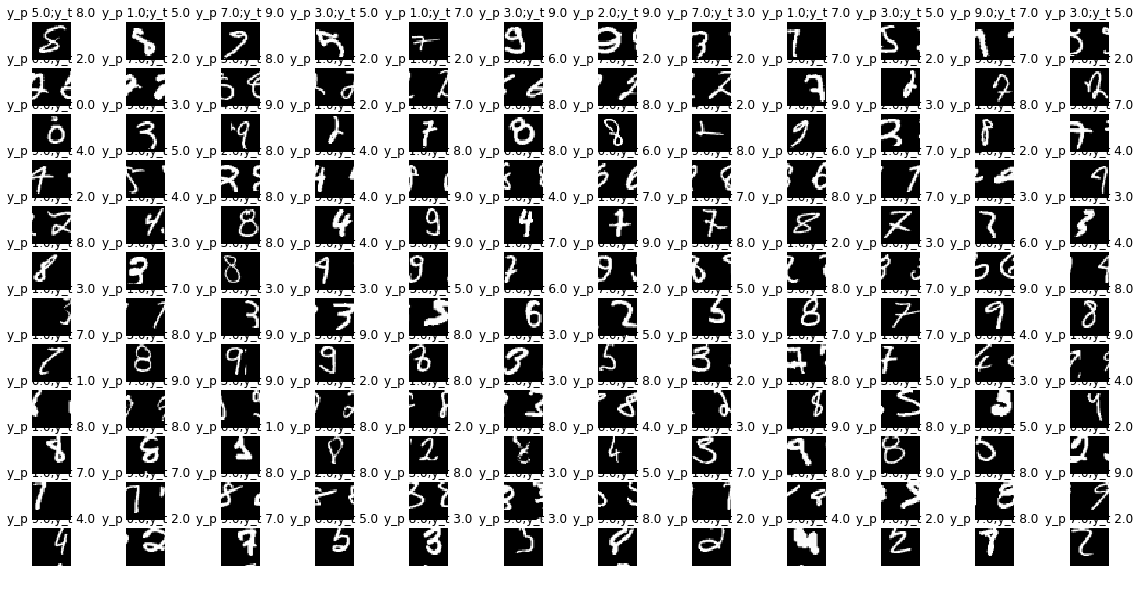

In [29]:
draw_numbers(np.resize(X_valid[np.where( y_pred!= y_valid )][:, 1:], (X_valid[np.where( y_pred!= y_valid )].shape[0], 28, 28)),y_valid[np.where( y_pred!= y_valid )],y_pred[np.where( y_pred!= y_valid)],12,12)

In [19]:
# Если честно, я многие из них сам не могу угадать

### Засабмитим для любопытссва реузультат KNN

In [ ]:
pred_test=knn.predict(np.resize(test_img, (test.shape[0], 28*28)))

In [91]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, int(p) ))

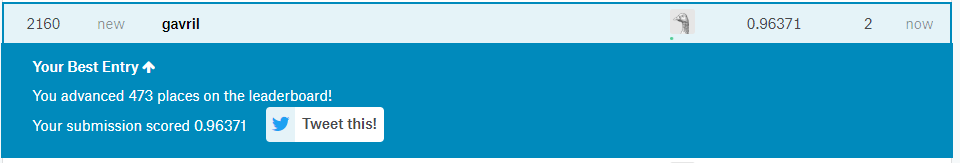

In [92]:
from IPython.display import Image
Image('submit_without_all.png')

In [ ]:
фильтр лапласа


In [112]:
train_lapl = np.zeros_like(train_img)
for i in range(len(train_img)):
    train_lapl[i] = cv2.Laplacian(train_img[i], cv2.CV_64F, ksize=3)

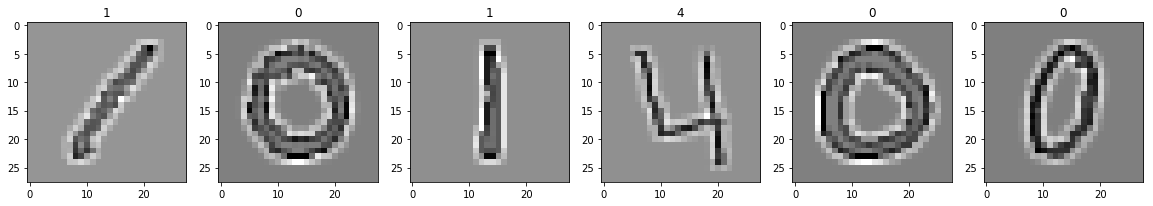

In [113]:
fig2 = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_lapl[: 6],1):    
    subplot2 = fig2.add_subplot(1,6,i)
    plt.imshow(img, cmap='gray')
    plt.title('%d' % train_label[i - 1])
    #subplot = fig2.add_subplot(3,6, i)
    #plt.plot(range(0,28),train_ln[i])

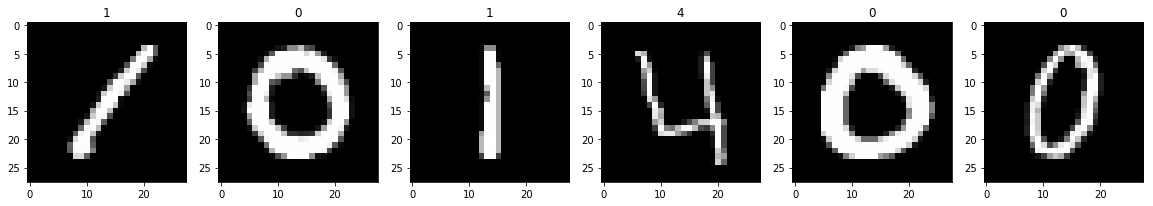

In [114]:
fig2 = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[: 6],1):    
    subplot2 = fig2.add_subplot(1,6,i)
    plt.imshow(img, cmap='gray')
    plt.title('%d' % train_label[i - 1])
    #subplot = fig2.add_subplot(3,6, i)
    #plt.plot(range(0,28),train_ln[i])

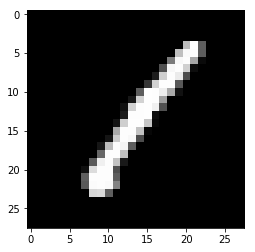

In [30]:
plt.imshow(train_img[0], cmap='gray')

In [34]:
def deskew(img):
    m = cv2.moments(img)
    if abs(m['mu02']) < 1e-2:
        return img.copy()
    skew = m['mu11']/m['mu02']
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    img = cv2.warpAffine(img,M,(SZ, SZ),flags=affine_flags)
    return img

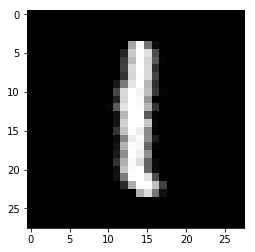

In [135]:
plt.imshow(deskew(train_img[0]), cmap='gray')

In [75]:
def deskew(img):
    SZ=img.shape[0]
    
    m = cv2.moments(img)
    if abs(m['mu02']) < 1e-2:
        # no deskewing needed. 
        return img.copy()
    # Calculate skew based on central momemts. 
    skew = m['mu11']/m['mu02']
    # Calculate affine transform to correct skewness. 
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    # Apply affine transform
    img = cv2.warpAffine(img, M, (SZ, SZ), flags=cv2.WARP_INVERSE_MAP | cv2.INTER_LINEAR)
    return img

In [136]:
train_img_deckew= np.array(list(map(deskew, train_img)))


In [137]:
test_img_deckew= np.array(list(map(deskew, test_img)))

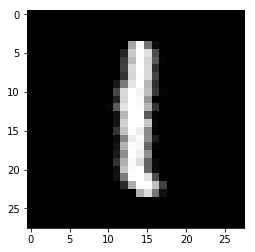

In [138]:
plt.imshow(deskew(train_img_deckew[0]), cmap='gray')

In [139]:
X_train_deckew, X_valid_deckew, y_train, y_valid_ = train_test_split(np.resize(train_img_deckew, (train.shape[0], 28*28)), train_label, test_size=0.30, random_state=42)

In [82]:
%%time
for est in estimators: 
    globals()[est+'_deckew']=estimators[est]
    eval(est+'_deckew').fit(X_train_deckew,y_train)
    cross_val_scores = cross_val_score(eval(est+'_deckew'), X_train_deckew,y_train, cv=5,n_jobs=-1)
    valid_score=accuracy_score(y_valid, eval(est+'_deckew').predict(X_valid_deckew))
    print(est+' Mean_cross_val_Accuracy ',cross_val_scores.mean(),' Valid_Accuracy: ' ,valid_score)
    results = results.append({'model' : est+'_deckew' , 'Mean_cross_val_Accuracy' : cross_val_scores.mean(),'Valid_Accuracy':valid_score} , ignore_index=True)
    print('____________________________________________________________________')

knn Mean_cross_val_Accuracy  0.9739117620901359  Valid_Accuracy:  0.9765873015873016
____________________________________________________________________
XGB Mean_cross_val_Accuracy  0.9536389493357179  Valid_Accuracy:  0.9499206349206349
____________________________________________________________________
Wall time: 23min 25s


In [83]:
results

,model,Mean_cross_val_Accuracy,Valid_Accuracy
0,knn,0.962245,0.965556
1,tree,0.843505,0.845476
2,forest,0.857075,0.870159
3,SVC,0.852891,0.872778
4,XGB,0.931021,0.929206
5,knn_deckew,0.962245,0.965556
6,knn_deckew,0.973912,0.976587
7,XGB_deckew,0.953639,0.949921


In [163]:
y_pred=knn_deckew.predict(X_test_deckew)

In [164]:
y_pred.shape

(12600,)

In [168]:
pred_test_deckew=knn_deckew.predict(np.resize(test_img_deckew, (test.shape[0], 28*28)))

In [167]:
pred_test

array([2., 0., 9., ..., 3., 9., 2.])

In [ ]:
## scores = cross_val_score(clf, x_train, y_train, cv=5)

In [ ]:
squared = list(map(lambda x: x**2, items))

In [ ]:
#x,y of the gradient using Sobel filter
sobel_x = np.zeros_like(X)
sobel_y = np.zeros_like(X)
for i in range(len(X)):
    sobel_x[i] = cv2.Sobel(X[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    sobel_y[i] = cv2.Sobel(X[i], cv2.CV_64F, dx=0, dy=1, ksize=3)
        
        #angle and length of a vector
g, theta = cv2.cartToPolar(sobel_x, sobel_y)

In [227]:
def hog(X,ksize=3):
    sobel_x = np.zeros_like(X)
    sobel_y = np.zeros_like(X)
    for i in range(len(X)):
        sobel_x[i] = cv2.Sobel(X[i], cv2.CV_64F, dx=1, dy=0, ksize=ksize)
        sobel_y[i] = cv2.Sobel(X[i], cv2.CV_64F, dx=0, dy=1, ksize=ksize)
        
        #angle and length of a vector
    g, theta = cv2.cartToPolar(sobel_x, sobel_y)
    return g, theta
   
        

In [164]:
train_deckew_g, train_deckew_theta=hog(train_img_deckew)

In [165]:
test_deckew_g, test_deckew_theta=hog(test_img_deckew)

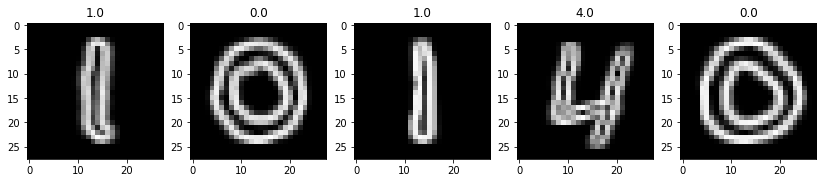

In [228]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_deckew_g[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1])
    

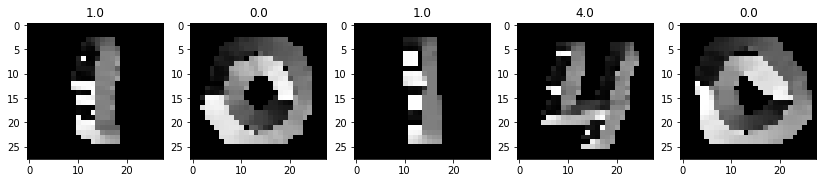

In [170]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_deckew_theta[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1])

In [171]:
#train_deckew_g, train_deckew_theta
train_deckew_hist = np.zeros((len(train_img_deckew), 16))
for i in range(len(train_img_deckew)):
    hist, borders = np.histogram(train_deckew_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=train_deckew_g[i])
    train_deckew_hist[i] = hist

In [ ]:
test_deckew_hist = np.zeros((len(test_img_deckew), 16))
for i in range(len(test_img_deckew)):
    hist, borders = np.histogram(test_deckew_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=test_deckew_g[i])
    test_deckew_hist[i] = hist

In [172]:
train_img_deckew.shape

(42000, 28, 28)

In [173]:
len(train_img_deckew[0][0]

SyntaxError: unexpected EOF while parsing (<ipython-input-173-b995d98112c6>, line 1)

(array([1., 0., 2., 1., 2., 5., 3., 1., 0., 1.]),
 array([ 5406.45247519,  6677.3485983 ,  7948.24472141,  9219.14084451,
        10490.03696762, 11760.93309073, 13031.82921383, 14302.72533694,
        15573.62146005, 16844.51758315, 18115.41370626]),
 <a list of 10 Patch objects>)

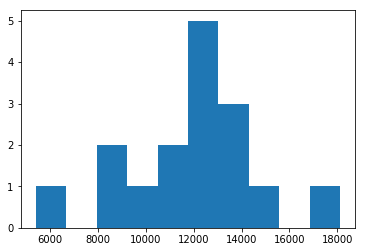

In [174]:
plt.hist(train_deckew_hist[1])

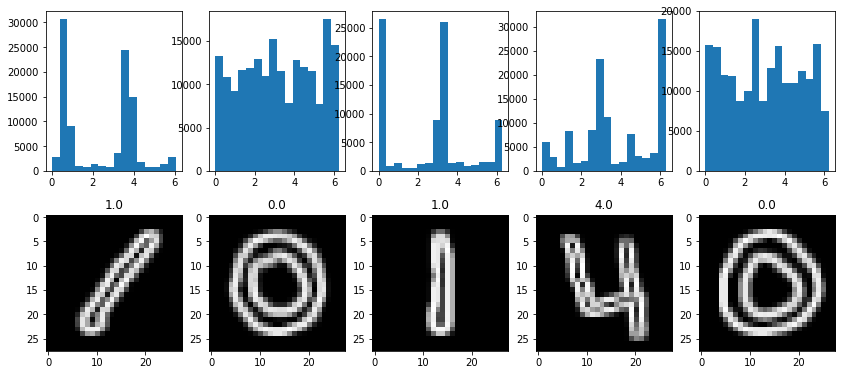

In [155]:

fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_g[:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);
    subplot = fig.add_subplot(3, 7, i)
    plt.hist(train_theta[i - 1].flatten(),
             bins=16, weights=train_g[i - 1].flatten())

(array([8., 4., 0., 1., 1., 0., 0., 1., 0., 1.]),
 array([  125.64788349,  2512.00892341,  4898.36996334,  7284.73100326,
         9671.09204318, 12057.45308311, 14443.81412303, 16830.17516295,
        19216.53620288, 21602.8972428 , 23989.25828272]),
 <a list of 10 Patch objects>)

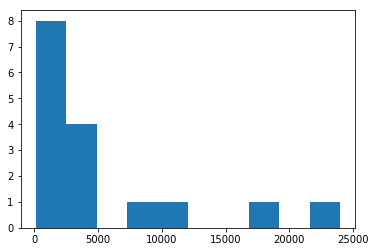

In [177]:
plt.hist(train_deckew_hist[0])

(array([8., 4., 0., 1., 1., 0., 0., 1., 0., 1.]),
 array([0.00367548, 0.07348187, 0.14328826, 0.21309464, 0.28290103,
        0.35270742, 0.42251381, 0.4923202 , 0.56212658, 0.63193297,
        0.70173936]),
 <a list of 10 Patch objects>)

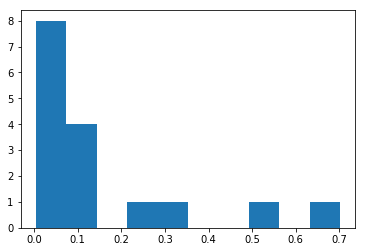

In [179]:
plt.hist(train_deckew_hist[0])

In [ ]:
train_deckew_hist

In [178]:
# По умолчанию используется L2 норма
train_deckew_hist = train_deckew_hist / np.linalg.norm(train_deckew_hist, axis=1)[:, None]

In [180]:
test_deckew_hist = test_deckew_hist / np.linalg.norm(test_deckew_hist, axis=1)[:, None]

In [220]:
X_deckew_hist_train, X_deckew_hist_valid, y_train, y_valid = train_test_split(train_deckew_hist, train_label, test_size=0.30, random_state=42)

In [221]:
%%time
for est in estimators: 
    globals()[est+'_deckew_hist']=estimators[est]
    eval(est+'_deckew_hist').fit(X_deckew_hist_train,y_train)
    cross_val_scores = cross_val_score(eval(est+'_deckew_hist'), X_deckew_hist_train,y_train, cv=5,n_jobs=-1)
    valid_score=accuracy_score(y_valid, eval(est+'_deckew_hist').predict(X_deckew_hist_valid))
    print(est+' Mean_cross_val_Accuracy ',cross_val_scores.mean(),' Valid_Accuracy: ' ,valid_score)
    results = results.append({'model' : est+'_deckew_hist' , 'Mean_cross_val_Accuracy' : cross_val_scores.mean(),'Valid_Accuracy':valid_score} , ignore_index=True)
    print('____________________________________________________________________')

knn Mean_cross_val_Accuracy  0.6743882348697297  Valid_Accuracy:  0.6763492063492064
____________________________________________________________________
XGB Mean_cross_val_Accuracy  0.6959523443939473  Valid_Accuracy:  0.6973809523809524
____________________________________________________________________
Wall time: 1min 8s


In [224]:
results

,model,Mean_cross_val_Accuracy,Valid_Accuracy
0,knn,0.962245,0.965556
1,tree,0.843505,0.845476
2,forest,0.857075,0.870159
3,SVC,0.852891,0.872778
4,XGB,0.931021,0.929206
6,knn_deckew,0.973912,0.976587
7,XGB_deckew,0.953639,0.949921
8,knn_deckew_hist,0.674388,0.676349
9,XGB_deckew_hist,0.695952,0.697381


In [223]:
#results=results.drop([5])



In [126]:
results

,model,Mean_cross_val_Accuracy,Valid_Accuracy
0,knn,0.962245,0.965556
1,tree,0.843505,0.845476
2,forest,0.857075,0.870159
3,SVC,0.852891,0.872778
4,XGB,0.931021,0.929206
5,knn_deckew,0.962245,0.965556
6,knn_deckew,0.973912,0.976587
7,XGB_deckew,0.953639,0.949921


In [111]:
train_g, train_theta=hog(train_img)

In [112]:
test_g, test_theta=hog(test_img)

In [115]:
 #Гистограммы вычисляются с учетом длины вектора градиента
train_hist = np.zeros((len(train_img), 16))
for i in range(len(train_img)):
    hist, borders = np.histogram(train_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i])
    train_hist[i] = hist

In [116]:
test_hist = np.zeros((len(test_img), 16))
for i in range(len(test_img)):
    hist, borders = np.histogram(test_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i])
    test_hist[i] = hist

In [117]:
# По умолчанию используется L2 норма
train_hist = train_hist / np.linalg.norm(train_hist, axis=1)[:, None]

In [118]:
test_hist = test_hist / np.linalg.norm(test_hist, axis=1)[:, None]

In [214]:
X_hist_train, X_hist_valid, y_train, y_valid = train_test_split(train_hist, train_label, test_size=0.30, random_state=42)

In [225]:
%%time
for est in estimators: 
    globals()[est+'_hist']=estimators[est]
    eval(est+'_hist').fit(X_hist_train,y_train)
    cross_val_scores = cross_val_score(eval(est+'_hist'), X_hist_train,y_train, cv=5,n_jobs=-1)
    valid_score=accuracy_score(y_valid, eval(est+'_hist').predict(X_hist_valid))
    print(est+' Mean_cross_val_Accuracy ',cross_val_scores.mean(),' Valid_Accuracy: ' ,valid_score)
    results = results.append({'model' : est+'_hist' , 'Mean_cross_val_Accuracy' : cross_val_scores.mean(),'Valid_Accuracy':valid_score} , ignore_index=True)
    print('____________________________________________________________________')

knn Mean_cross_val_Accuracy  0.5771069215620527  Valid_Accuracy:  0.5793650793650794
____________________________________________________________________
XGB Mean_cross_val_Accuracy  0.6310194509705583  Valid_Accuracy:  0.6265079365079365
____________________________________________________________________
Wall time: 57.5 s


In [226]:
results

,model,Mean_cross_val_Accuracy,Valid_Accuracy
0,knn,0.962245,0.965556
1,tree,0.843505,0.845476
2,forest,0.857075,0.870159
3,SVC,0.852891,0.872778
4,XGB,0.931021,0.929206
5,knn_deckew,0.973912,0.976587
6,XGB_deckew,0.953639,0.949921
7,knn_deckew_hist,0.674388,0.676349
8,XGB_deckew_hist,0.695952,0.697381
9,knn_hist,0.577107,0.579365


In [ ]:
## чот сущевтенно  хуже стало

### Попробуем некокторые морфологческие преобразования

In [ ]:
# Биноризуем картинки

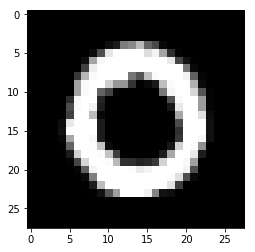

In [266]:
plt.imshow(train_img_deckew[1], cmap='gray')

In [264]:
def binar(img,threshold=5, max_value=255.0):
    return max_value * (img > threshold)

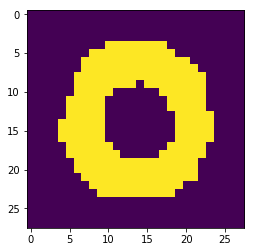

In [268]:
plt.imshow(binar(train_img_deckew[1]))

In [291]:
a=binar(train_img_deckew[1])


In [303]:
ret

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0

In [382]:
def Morpholog_transformation(img,method='erode',k_size=1):
    kernel = np.ones((k_size, k_size), np.float32)
    ret = np.zeros_like(img)
    for i in range(len(img)):
       # ret=2
        if    method == 'erode':
            ret[i] = cv2.erode(img[i],kernel,iterations = 1)[:, 0]
        elif  method == 'dilate':
            ret[i] = cv2.dilate(img[i],kernel,iterations = 1)[:, 0]
        elif  method == 'open':
            ret[i] = cv2.morphologyEx(img[i], cv2.MORPH_OPEN,kernel)[:, 0]
        elif  method == 'close':
            ret[i] = cv2.morphologyEx(img[i],cv2.MORPH_CLOSE,kernel)[:, 0]
    return ret

In [425]:
kernels=[1,2,3,5,8]
methods=['erode','dilate','open','close']

In [427]:
for ker  in kernels:
    for met in methods:
        print(ker,met)

1 erode
1 dilate
1 open
1 close
2 erode
2 dilate
2 open
2 close
3 erode
3 dilate
3 open
3 close
5 erode
5 dilate
5 open
5 close
8 erode
8 dilate
8 open
8 close


In [417]:
kernels=[1,2]
methods=['erode']

In [ ]:
plt.imshow(Morpholog_transformation(a,method='close',k_size=3))

In [ ]:

for ker  in kernels:
    for met in methods:
        #print(ker,met)
        #print('train_img_deckew_'+met+'_k_size_'+str(ker))
        globals()['train_img_deckew_'+met+'_k_size_'+str(ker)]=np.array(list(map(partial(Morpholog_transformation,method=met,k_size=ker),train_img_deckew)))
        X_train, X_valid, y_train, y_valid = train_test_split(np.resize(eval('train_img_deckew_'+met+'_k_size_'+str(ker)), (train.shape[0], 28*28)), train_label, test_size=0.30, random_state=42)
        
        
        for est in estimators: 
            globals()[est+'_deckew_'+met+'_k_size_'+str(ker)]=estimators[est]
            eval(est+'_deckew_'+met+'_k_size_'+str(ker)).fit(X_train,y_train)
            cross_val_scores = cross_val_score(eval(est+'_deckew_'+met+'_k_size_'+str(ker)), X_train,y_train, cv=5,n_jobs=-1)
            valid_score=accuracy_score(y_valid, eval(est+'_deckew').predict(X_valid))
            print('____________________________________________________________________')
            print(ker,met)
            print(est+' Mean_cross_val_Accuracy ',cross_val_scores.mean(),' Valid_Accuracy: ' ,valid_score)
            results = results.append({'model' : est+'_deckew_'+met+'_k_size_'+str(ker) , 'Mean_cross_val_Accuracy' : cross_val_scores.mean(),'Valid_Accuracy':valid_score} , ignore_index=True)
           

____________________________________________________________________
1 erode
knn Mean_cross_val_Accuracy  0.9739117620901359  Valid_Accuracy:  0.9765873015873016
____________________________________________________________________
1 erode
XGB Mean_cross_val_Accuracy  0.9536389493357179  Valid_Accuracy:  0.9499206349206349
____________________________________________________________________
1 dilate
knn Mean_cross_val_Accuracy  0.9739117620901359  Valid_Accuracy:  0.9765873015873016
____________________________________________________________________
1 dilate
XGB Mean_cross_val_Accuracy  0.9536389493357179  Valid_Accuracy:  0.9499206349206349
____________________________________________________________________
1 open
knn Mean_cross_val_Accuracy  0.9739117620901359  Valid_Accuracy:  0.9765873015873016
____________________________________________________________________
1 open
XGB Mean_cross_val_Accuracy  0.9536389493357179  Valid_Accuracy:  0.9499206349206349
____________________________

In [ ]:
#results=results.drop([5])

In [433]:
results

,model,Mean_cross_val_Accuracy,Valid_Accuracy
0,knn,0.962245,0.965556
1,tree,0.843505,0.845476
2,forest,0.857075,0.870159
3,SVC,0.852891,0.872778
4,XGB,0.931021,0.929206
5,knn_deckew,0.973912,0.976587
6,XGB_deckew,0.953639,0.949921
7,knn_deckew_hist,0.674388,0.676349
8,XGB_deckew_hist,0.695952,0.697381
9,knn_hist,0.577107,0.579365
